In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
data = pd.read_csv(r"C:\Users\adamd\Downloads\titanic\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
print(data.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [7]:
from sklearn.impute import SimpleImputer

In [14]:
si = SimpleImputer(strategy='mean')
si.fit(data.Age.values.reshape(-1, 1))
data.Age = si.transform(data.Age.values.reshape(-1, 1))
print(data.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [16]:
data.Embarked = data.Embarked.fillna('U')
print(data.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [18]:
x = data.drop("Survived", axis=1)
y = data.Survived

In [23]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
x.Sex = lb.fit_transform(x.Sex)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x.Embarked = le.fit_transform(x.Embarked)

In [25]:
print(x.Sex.head(), x.Embarked.head(), sep='\t')

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32	0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int32


In [19]:
list(x.columns)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

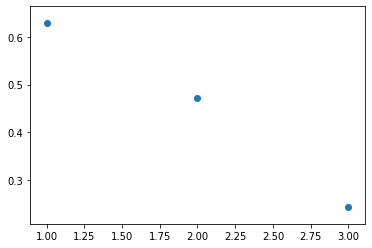

In [22]:
pc = pd.DataFrame(dict(pcl=x.Pclass, sv=y))
pc1 = pc[pc.pcl==1]
pc2 = pc[pc.pcl==2]
pc3 = pc[pc.pcl==3]
pcm = [pc1.sv.mean(), pc2.sv.mean(), pc3.sv.mean()]
plt.scatter([1, 2, 3], pcm)

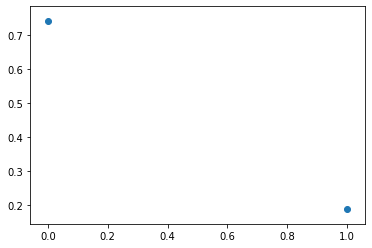

In [27]:
sx = pd.DataFrame(dict(sex=x.Sex, sv=y))
sx0 = sx[sx.sex==0]
sx1 = sx[sx.sex==1]
sxm = [sx0.sv.mean(), sx1.sv.mean()]
plt.scatter([0, 1], sxm)

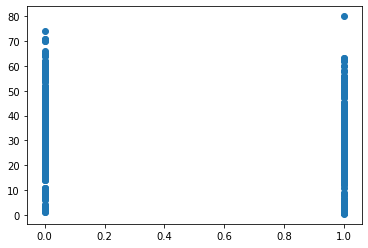

In [28]:
plt.scatter(y, x.Age)

In [29]:
print(x.SibSp.unique())

[1 0 3 4 2 5 8]


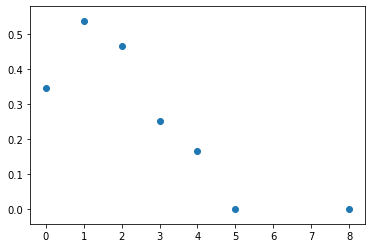

In [30]:
sp = pd.DataFrame(dict(sibsp=x.SibSp, sv=y))
spx = x.SibSp.unique()
spy = [sp[sp.sibsp==n].sv.mean() for n in spx]
plt.scatter(spx, spy)

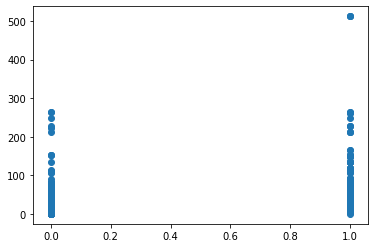

In [32]:
plt.scatter(y, x.Fare)

In [33]:
x = x.drop("Fare", axis=1)

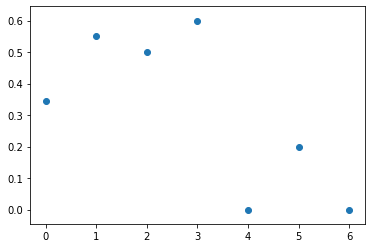

In [35]:
ph = pd.DataFrame(dict(parch=x.Parch, sv=y))
phx = x.Parch.unique()
phy = [ph[ph.parch==n].sv.mean() for n in phx]
plt.scatter(phx, phy)

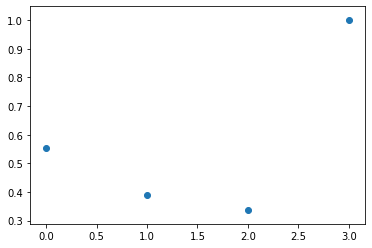

In [38]:
em = pd.DataFrame(dict(embarked=x.Embarked, sv=y))
emx = em.embarked.unique()
emy = [em[em.embarked==n].sv.mean() for n in emx]
plt.scatter(emx, emy)

In [39]:
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
